In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# --- Carregue o arquivo CSV ---
df_bh = pd.read_excel('../../dados_tratados/excel/belo_horrizonte_2002.xlsx')


# --- Limpeza e Preparação ---

# Renomear as colunas de interesse para facilitar a manipulação
colunas_renomeadas = {
    'Sexo': 'sexo',
    'faixas de idade': 'faixa_idade',
    'Estado civil': 'estado_civil',
    'cor ou raça': 'cor_raca',
    'curso mais elevado frequentado': 'escolaridade',
    'ESTRATO': 'estrato_bairro',
    'Risco de roubo (grande, médio e pequeno)': 'risco_roubo',
    'Risco de agressão': 'risco_agressao',
    'Risco de sequestro': 'risco_sequestro'
}
df_bh.rename(columns=colunas_renomeadas, inplace=True)

# Selecionar apenas as colunas de interesse para a análise
colunas_analise = list(colunas_renomeadas.values())
df_analise = df_bh[colunas_analise].copy()

# Remover linhas onde as variáveis essenciais são nulas
df_analise.dropna(subset=['sexo', 'faixa_idade', 'cor_raca', 'risco_roubo', 'risco_agressao', 'risco_sequestro'], inplace=True)

# Limpar e padronizar os dados de 'cor_raca'
df_analise['cor_raca'] = df_analise['cor_raca'].str.strip().replace({'Mistura negro e de branco': 'Parda'})

print("Dados carregados e preparados com sucesso!")
print(f"Total de registros para análise: {len(df_analise)}")
print("\nPrimeiras 5 linhas do dataset limpo:")
print(df_analise.head())

Dados carregados e preparados com sucesso!
Total de registros para análise: 3913

Primeiras 5 linhas do dataset limpo:
        sexo      faixa_idade estado_civil cor_raca   escolaridade  \
0  Masculino  41 anos ou mais    Casado(a)   Branca  1a a 8a série   
1   Feminino  de 21 a 30 anos    Casado(a)    Parda   1o ao 3o ano   
2   Feminino  41 anos ou mais  Separado(a)   Branca  1a a 8a série   
3   Feminino  41 anos ou mais    Casado(a)   Branca  1a a 8a série   
4   Feminino  de 21 a 30 anos  Solteiro(a)   Branca  1a a 8a série   

        estrato_bairro  risco_roubo  risco_agressao  risco_sequestro  
0  Bairro não violento          0.0             0.0              0.0  
1  Bairro não violento          1.0             1.0              0.0  
2  Bairro não violento          1.0             1.0              1.0  
3  Bairro não violento          1.0             0.0              1.0  
4  Bairro não violento          2.0             2.0              2.0  


C:\Users\pedro\AppData\Local\Temp\ipykernel_13928\1852251696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analise, x='sexo', ax=axes[0], palette='viridis', order=df_analise['sexo'].value_counts().index)
C:\Users\pedro\AppData\Local\Temp\ipykernel_13928\1852251696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analise, y='cor_raca', ax=axes[1], palette='plasma', order=df_analise['cor_raca'].value_counts().index)


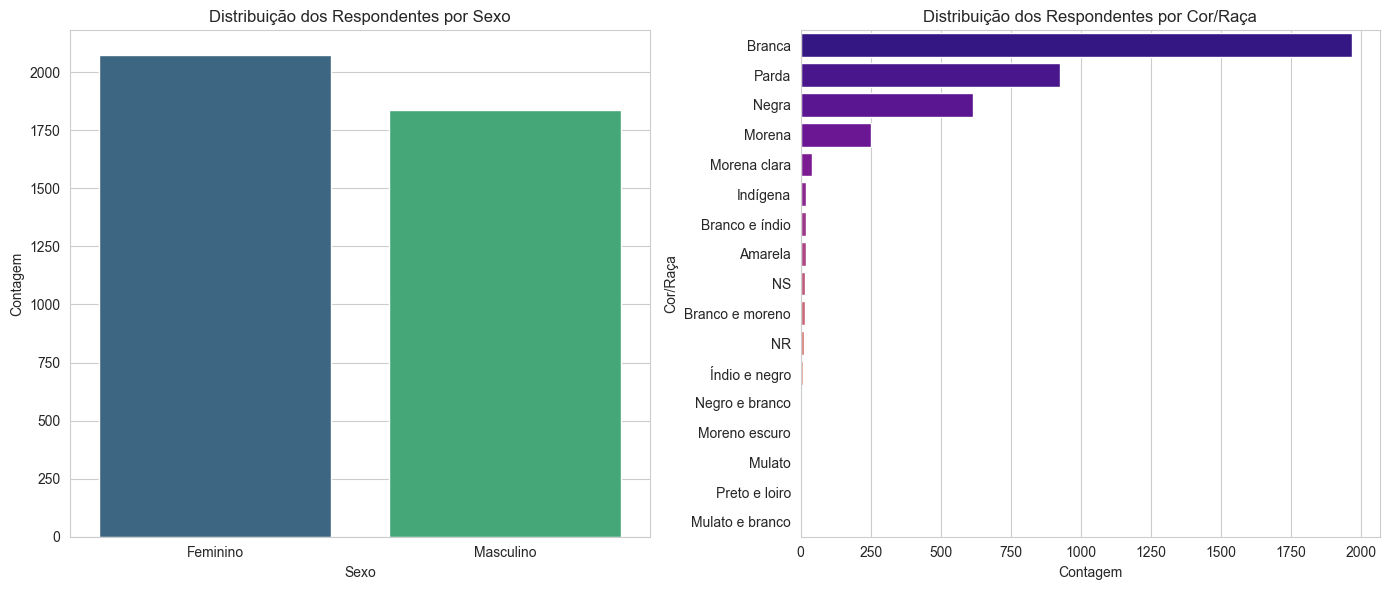

In [7]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [14, 6]

# Criar uma figura com dois subplots
fig, axes = plt.subplots(1, 2)

# Gráfico 1: Distribuição por Sexo
sns.countplot(data=df_analise, x='sexo', ax=axes[0], palette='viridis', order=df_analise['sexo'].value_counts().index)
axes[0].set_title('Distribuição dos Respondentes por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Contagem')

# Gráfico 2: Distribuição por Cor/Raça
sns.countplot(data=df_analise, y='cor_raca', ax=axes[1], palette='plasma', order=df_analise['cor_raca'].value_counts().index)
axes[1].set_title('Distribuição dos Respondentes por Cor/Raça')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('Cor/Raça')


plt.tight_layout()
plt.show()

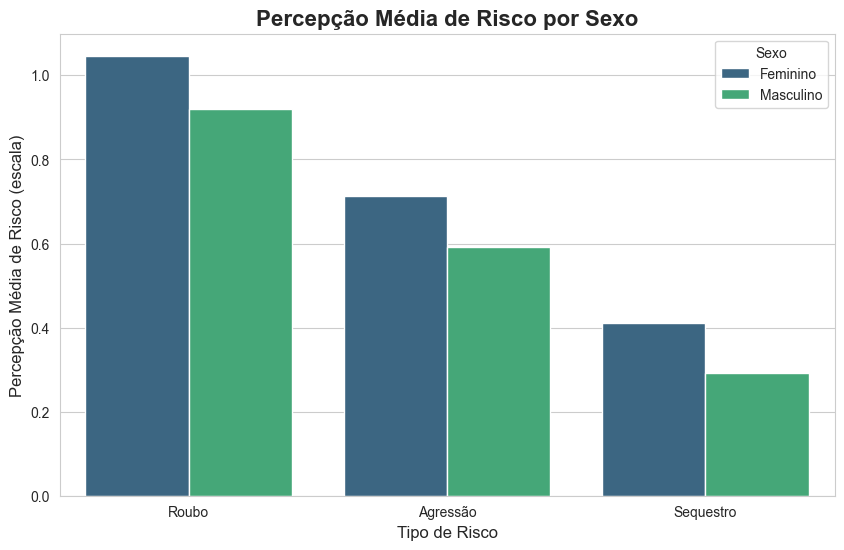

Tabela: Percepção Média de Risco por Sexo
           risco_roubo  risco_agressao  risco_sequestro
sexo                                                   
Feminino          1.05            0.71             0.41
Masculino         0.92            0.59             0.29


In [8]:
# Calcular a média de risco por sexo
df_risco_sexo = df_analise.groupby('sexo')[['risco_roubo', 'risco_agressao', 'risco_sequestro']].mean().reset_index()

# Reformatar o dataframe para visualização
df_risco_sexo_melted = df_risco_sexo.melt(id_vars='sexo', var_name='tipo_risco', value_name='percepcao_media_risco')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_risco_sexo_melted, x='tipo_risco', y='percepcao_media_risco', hue='sexo', palette='viridis')

plt.title('Percepção Média de Risco por Sexo', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Risco', fontsize=12)
plt.ylabel('Percepção Média de Risco (escala)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Roubo', 'Agressão', 'Sequestro'])
plt.legend(title='Sexo')
plt.show()

# Exibir a tabela com os dados
print("Tabela: Percepção Média de Risco por Sexo")
print(df_risco_sexo.set_index('sexo').round(2))

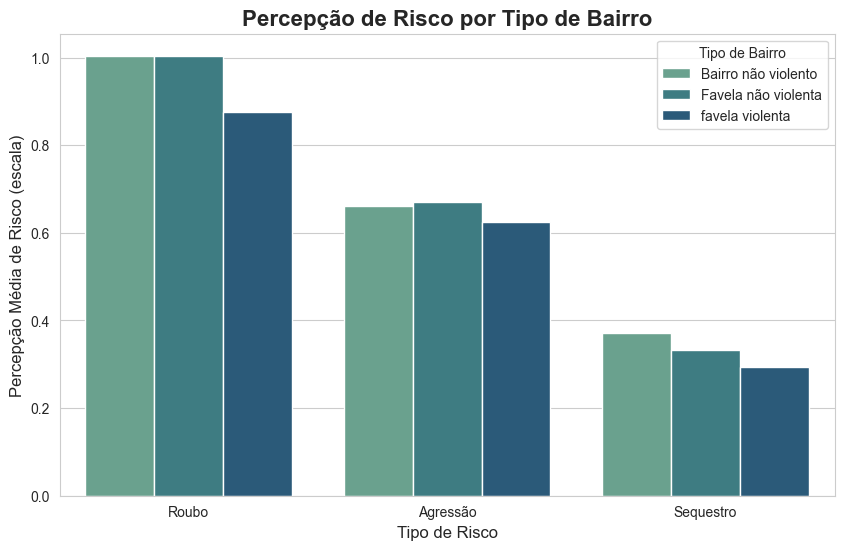

Tabela: Percepção Média de Risco por Tipo de Bairro
                     risco_roubo  risco_agressao  risco_sequestro
estrato_bairro                                                   
Bairro não violento         1.00            0.66             0.37
Favela não violenta         1.00            0.67             0.33
favela violenta             0.88            0.62             0.29


In [9]:
# Calcular a média de risco por estrato do bairro
df_risco_bairro = df_analise.groupby('estrato_bairro')[['risco_roubo', 'risco_agressao', 'risco_sequestro']].mean().reset_index()

# Reformatar o dataframe para visualização
df_risco_bairro_melted = df_risco_bairro.melt(id_vars='estrato_bairro', var_name='tipo_risco', value_name='percepcao_media_risco')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_risco_bairro_melted, x='tipo_risco', y='percepcao_media_risco', hue='estrato_bairro', palette='crest')

plt.title('Percepção de Risco por Tipo de Bairro', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Risco', fontsize=12)
plt.ylabel('Percepção Média de Risco (escala)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Roubo', 'Agressão', 'Sequestro'])
plt.legend(title='Tipo de Bairro')
plt.show()

# Exibir a tabela com os dados
print("Tabela: Percepção Média de Risco por Tipo de Bairro")
print(df_risco_bairro.set_index('estrato_bairro').round(2))

In [10]:
# --- ETAPA 1: CARREGAR E ANALISAR OS DADOS ---

try:

    colunas_renomeadas = {
        'Sexo': 'sexo',
        'ESTRATO': 'estrato_bairro',
        'Risco de roubo (grande, médio e pequeno)': 'risco_roubo',
        'Risco de agressão': 'risco_agressao',
        'Risco de sequestro': 'risco_sequestro'
    }
    df_bh.rename(columns=colunas_renomeadas, inplace=True)

    colunas_analise = list(colunas_renomeadas.values())
    df_analise = df_bh[colunas_analise].copy()
    df_analise.dropna(inplace=True)

    df_risco_sexo = df_analise.groupby('sexo')[['risco_roubo', 'risco_agressao', 'risco_sequestro']].mean()
    df_risco_bairro = df_analise.groupby('estrato_bairro')[['risco_roubo', 'risco_agressao', 'risco_sequestro']].mean()

    print("Análise dos dados concluída com sucesso.")

except FileNotFoundError:
    print("ERRO: O arquivo 'belo_horrizonte_2002.xlsx - Sheet1.csv' não foi encontrado.")
    exit()

# --- ETAPA 2: GERAR E SALVAR OS GRÁFICOS ---

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Gráfico 1: Percepção de Risco por Sexo
df_risco_sexo_melted = df_risco_sexo.reset_index().melt(id_vars='sexo', var_name='tipo_risco', value_name='percepcao_media')
plt.figure()
sns.barplot(data=df_risco_sexo_melted, x='tipo_risco', y='percepcao_media', hue='sexo', palette='viridis')
plt.title('Percepção Média de Risco por Sexo', fontsize=16)
plt.xlabel('Tipo de Risco')
plt.ylabel('Percepção Média de Risco')
plt.xticks(ticks=[0, 1, 2], labels=['Roubo', 'Agressão', 'Sequestro'])
plt.legend(title='Sexo')
caminho_grafico_sexo = "grafico_risco_sexo.png"
plt.savefig(caminho_grafico_sexo)
plt.close() # Fecha a figura para não interferir no próximo gráfico

# Gráfico 2: Percepção de Risco por Tipo de Bairro
df_risco_bairro_melted = df_risco_bairro.reset_index().melt(id_vars='estrato_bairro', var_name='tipo_risco', value_name='percepcao_media')
plt.figure()
sns.barplot(data=df_risco_bairro_melted, x='tipo_risco', y='percepcao_media', hue='estrato_bairro', palette='crest')
plt.title('Percepção de Risco por Tipo de Bairro', fontsize=16)
plt.xlabel('Tipo de Risco')
plt.ylabel('Percepção Média de Risco')
plt.xticks(ticks=[0, 1, 2], labels=['Roubo', 'Agressão', 'Sequestro'])
plt.legend(title='Tipo de Bairro')
caminho_grafico_bairro = "grafico_risco_bairro.png"
plt.savefig(caminho_grafico_bairro)
plt.close()

print("Gráficos gerados e salvos temporariamente.")

# --- ETAPA 3: GERAR O CONTEÚDO E O PDF ---

# (Função e formatação de texto permanecem as mesmas da versão anterior)
def formatar_df_para_texto(df, titulo):
    df_rounded = df.round(2)
    cabecalho = " | ".join([f"{col:<18}" for col in [df_rounded.index.name] + df_rounded.columns.tolist()])
    separador = "-" * len(cabecalho)
    linhas_dados = [f"{index:<18} | " + " | ".join([f"{str(value):<18}" for value in row]) for index, row in df_rounded.iterrows()]
    return f"{titulo}\n{separador}\n{cabecalho}\n{separador}\n" + "\n".join(linhas_dados) + f"\n{separador}"

tabela_sexo_texto = formatar_df_para_texto(df_risco_sexo, "Tabela 1: Percepção Média de Risco por Sexo")
tabela_bairro_texto = formatar_df_para_texto(df_risco_bairro, "\nTabela 2: Percepção Média de Risco por Tipo de Bairro")
# ... (restante do código para gerar o PDF)

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Análise de Percepção Social - Belo Horizonte 2002', 0, 1, 'C')
        self.ln(5)
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')

# Criação do PDF
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.multi_cell(0, 10, "Relatório Final da Análise de Percepção Social", 0, 'C')
pdf.ln(5)

# Seção de Texto
pdf.set_font('Arial', '', 11)
pdf.multi_cell(0, 7, f"Data da Análise: {pd.Timestamp.now().strftime('%d de %B de %Y')}\n\n1. Resumo e Tabelas")
pdf.ln(5)

# Inserindo tabelas com fonte monoespaçada para alinhamento
pdf.set_font('Courier', '', 10)
pdf.multi_cell(0, 5, f"{tabela_sexo_texto}\n{tabela_bairro_texto}")
pdf.ln(5)

# Seção de Gráficos
pdf.add_page()
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, '2. Visualizações Gráficas', 0, 1, 'L')
pdf.ln(5)

pdf.set_font('Arial', 'I', 12)
pdf.cell(0, 10, 'Gráfico 1: Análise de Risco por Sexo', 0, 1, 'C')
# Largura da imagem no PDF (ex: 180mm). A altura é calculada automaticamente para manter a proporção.
pdf.image(caminho_grafico_sexo, w=180) 
pdf.ln(10)

pdf.cell(0, 10, 'Gráfico 2: Análise de Risco por Tipo de Bairro', 0, 1, 'C')
pdf.image(caminho_grafico_bairro, w=180)

# --- ETAPA 4: SALVAR O PDF E LIMPAR ARQUIVOS TEMPORÁRIOS ---
pasta_analises = os.path.join('..', '..', 'analises')
if not os.path.exists(pasta_analises):
    os.makedirs(pasta_analises)
    print(f"Pasta '{pasta_analises}' criada.")

caminho_arquivo_pdf = os.path.join(pasta_analises, "relatorio_completo_percepcao_social.pdf")

try:
    pdf.output(caminho_arquivo_pdf)
    caminho_absoluto = os.path.abspath(caminho_arquivo_pdf)
    print(f"\nPDF gerado com sucesso!")
    print(f"O arquivo foi salvo em: {caminho_absoluto}")
except Exception as e:
    print(f"\nOcorreu um erro ao gerar o PDF: {e}")
finally:
    # Limpeza dos arquivos de imagem temporários
    os.remove(caminho_grafico_sexo)
    os.remove(caminho_grafico_bairro)
    print("Arquivos de imagem temporários foram removidos.")

Análise dos dados concluída com sucesso.
Gráficos gerados e salvos temporariamente.

PDF gerado com sucesso!
O arquivo foi salvo em: c:\Users\pedro\OneDrive\Documentos\GitHub\Repositorio_pesquisas\analises_vitimizacao\analises\relatorio_completo_percepcao_social.pdf
Arquivos de imagem temporários foram removidos.
